In [1]:
pip install pyspark


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pyspark.sql import SparkSession

# 创建 SparkSession
spark = SparkSession.builder \
    .appName("data_analysis") \
    .getOrCreate()

# 读取第一个数据集
df1_1 = spark.read.csv("Jan_transaction.csv", header=True, inferSchema=True)
df1_2 =  spark.read.csv("Jan_gps.csv", header=True, inferSchema=True)
df2 = spark.read.csv("Feb.csv", header=True, inferSchema=True)
df3 = spark.read.csv("Mar_m.csv", header=True, inferSchema=True)

join_condition = df1_1['transaction_id'] == df1_2['transaction_id2']
df1 = df1_1.join(df1_2, join_condition, 'inner')
# df1 = df1.drop("transaction_id2")
df1 = df1.select("transaction_id", "fraud", "card_number", "issue_year", "days_since_last_transaction", "repeat_retailer", "used_chip", "used_pin_number", "online_order", "single_transaction_mean", "transaction_amount", "distance_from_home", "distance_from_last_transaction")
df2 = df2.select("transaction_id", "fraud", "card_number", "issue_year", "days_since_last_transaction", "repeat_retailer", "used_chip", "used_pin_number", "online_order", "single_transaction_mean", "transaction_amount", "distance_from_home", "distance_from_last_transaction")
df3 = df3.select("transaction_id", "fraud", "card_number", "issue_year", "days_since_last_transaction", "repeat_retailer", "used_chip", "used_pin_number", "online_order", "single_transaction_mean", "transaction_amount", "distance_from_home", "distance_from_last_transaction")

data_df = df1.union(df2).union(df3)

# 展示合并后的数据
# data_df.show()



24/05/08 10:52:12 WARN Utils: Your hostname, ningningdeMacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.1.110 instead (on interface en0)
24/05/08 10:52:12 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/08 10:52:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
data_df.count()

737926

In [5]:
len(data_df.columns)

13

In [6]:
summary = data_df.describe().toPandas()
print(summary)

24/05/08 10:52:18 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


  summary transaction_id                fraud          card_number  \
0   count         737926               737926               737926   
1    mean           None  0.10555936503118199                 None   
2  stddev           None  0.30727302750835644                 None   
3     min  A000004871869                    0  6222-00000014256363   
4     max  Z999970667182                    1  6222-99999684628664   

           issue_year days_since_last_transaction      repeat_retailer  \
0              737926                      737926               737926   
1  2020.5074248637397           25.96424031677973   0.8818648482368151   
2  2.2890205092986498          15.531991706470224  0.32276830522791505   
3                2017                           0                    0   
4                2024                          77                    1   

             used_chip      used_pin_number         online_order  \
0               737926               737792               737926  

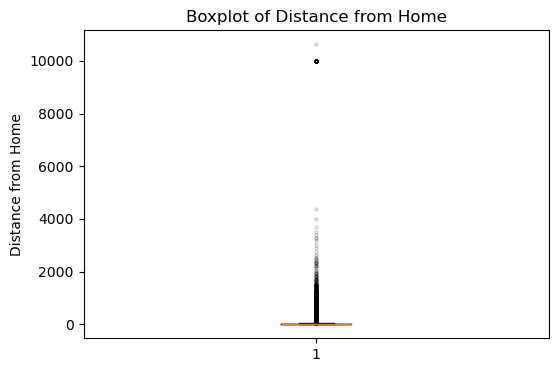

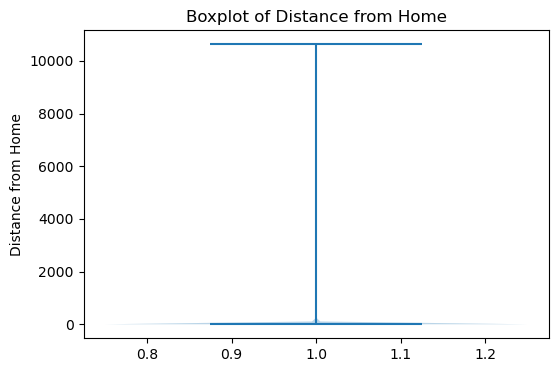

In [7]:
import matplotlib.pyplot as plt

# 假设 data_df 是你的 DataFrame，可以根据实际情况进行调整
# data_df = ...

# 提取 distance_from_home 列的值
distance_from_home_values = data_df.select("distance_from_home").rdd.flatMap(lambda x: x).collect()

# 绘制箱线图
plt.figure(figsize=(6, 4))
plt.boxplot(distance_from_home_values, flierprops=dict(marker='o', markersize=2, alpha=0.2))
plt.title('Boxplot of Distance from Home')
plt.ylabel('Distance from Home')
plt.show()
# 小提琴
plt.figure(figsize=(6, 4))
plt.violinplot(distance_from_home_values)
plt.title('Boxplot of Distance from Home')
plt.ylabel('Distance from Home')
plt.show()



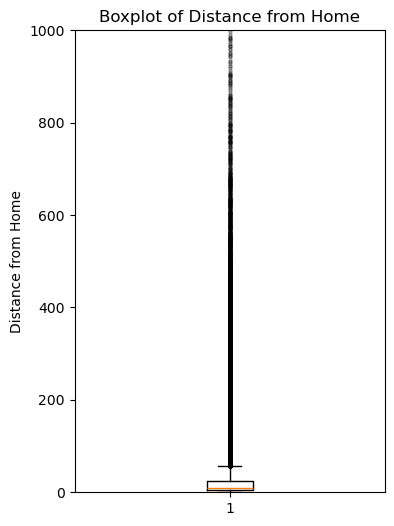

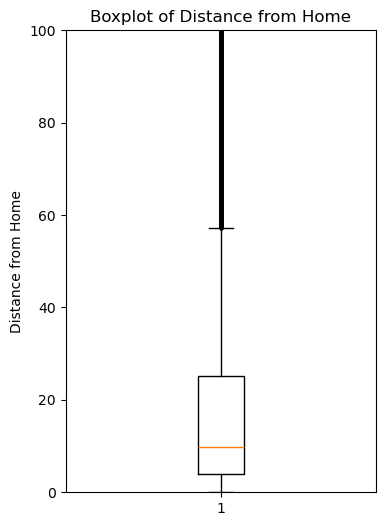

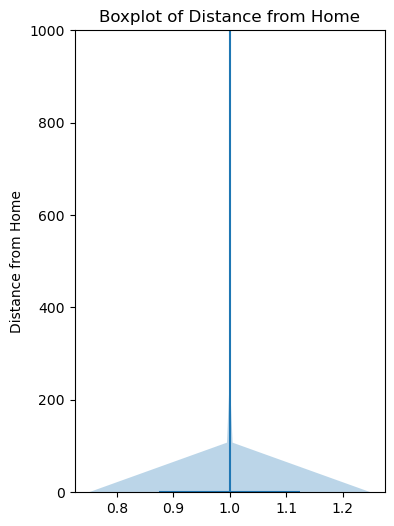

In [8]:
# 箱线图
plt.figure(figsize=(4, 6))
plt.boxplot(distance_from_home_values, flierprops=dict(marker='o', markersize=2, alpha=0.2))
plt.title('Boxplot of Distance from Home')
plt.ylabel('Distance from Home')
plt.ylim(0, 1000)
plt.show()
plt.figure(figsize=(4, 6))
plt.boxplot(distance_from_home_values, flierprops=dict(marker='o', markersize=2, alpha=0.2))
plt.title('Boxplot of Distance from Home')
plt.ylabel('Distance from Home')
plt.ylim(0, 100)
plt.show()
# 小提琴
plt.figure(figsize=(4, 6))
plt.violinplot(distance_from_home_values)
plt.title('Boxplot of Distance from Home')
plt.ylabel('Distance from Home')
plt.ylim(0, 1000)
plt.show()

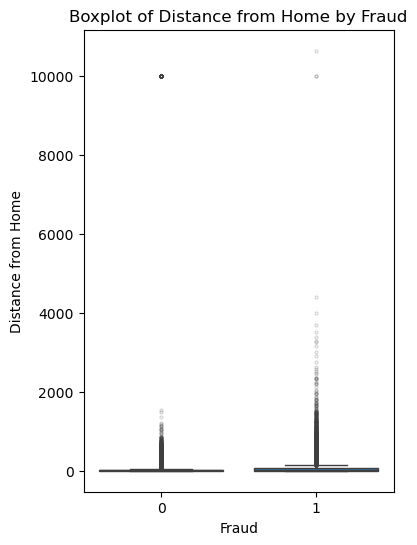

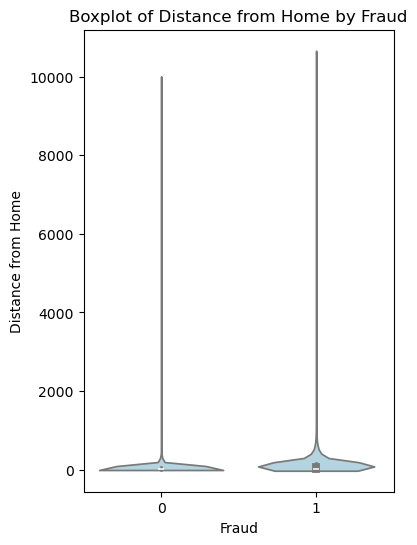

In [9]:
import pandas as pd
import seaborn as sns

df = data_df.select("fraud", "distance_from_home").toPandas()

# 绘制箱线图
plt.figure(figsize=(4, 6))
sns.boxplot(x='fraud', y='distance_from_home', data=df, flierprops=dict(marker='o', markersize=2, alpha=0.2))
plt.title('Boxplot of Distance from Home by Fraud')
plt.xlabel('Fraud')
plt.ylabel('Distance from Home')
plt.show()

# 绘制
plt.figure(figsize=(4, 6))
sns.violinplot(x='fraud', y='distance_from_home', data=df, color='lightblue')
plt.title('Boxplot of Distance from Home by Fraud')
plt.xlabel('Fraud')
plt.ylabel('Distance from Home')
plt.show()

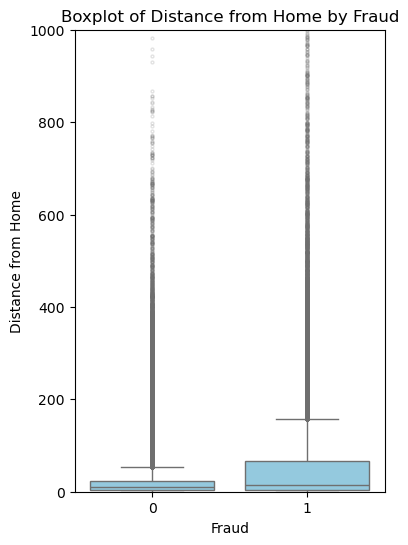

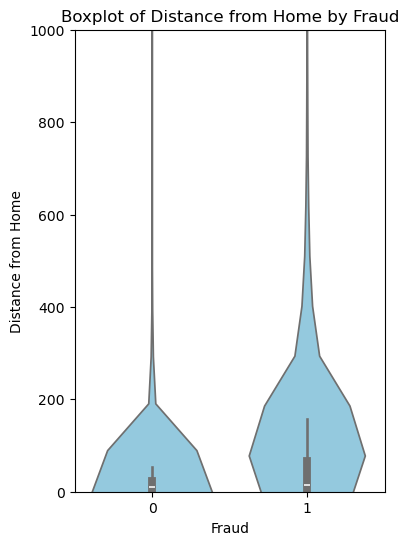

In [10]:
# 绘制箱线图
plt.figure(figsize=(4, 6))
sns.boxplot(x='fraud', y='distance_from_home', data=df, color='skyblue', flierprops=dict(marker='o', markersize=2, alpha=0.2))
plt.title('Boxplot of Distance from Home by Fraud')
plt.xlabel('Fraud')
plt.ylabel('Distance from Home')
plt.ylim(0, 1000)
plt.show()

# 绘制
plt.figure(figsize=(4, 6))
sns.violinplot(x='fraud', y='distance_from_home', data=df, color='skyblue')
plt.title('Boxplot of Distance from Home by Fraud')
plt.xlabel('Fraud')
plt.ylabel('Distance from Home')
plt.ylim(0, 1000)
plt.show()

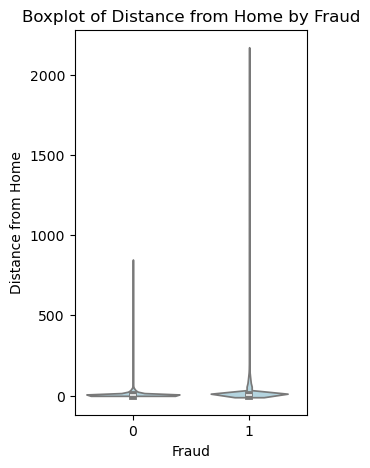

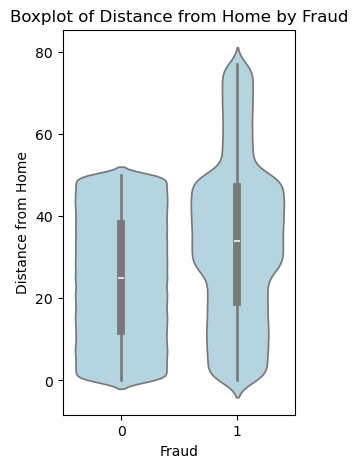

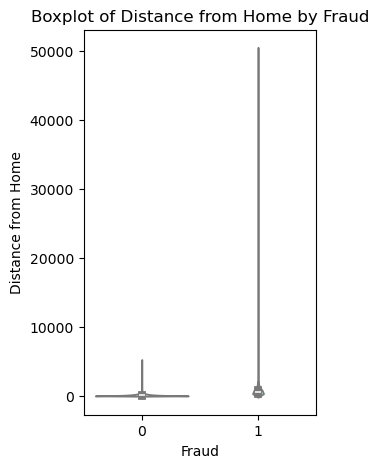

In [11]:
df = data_df.select("fraud", "distance_from_last_transaction").toPandas()

# 绘制箱线图
plt.figure(figsize=(3, 5))
sns.violinplot(x='fraud', y='distance_from_last_transaction', data=df, color='lightblue')
plt.title('Boxplot of Distance from Home by Fraud')
plt.xlabel('Fraud')
plt.ylabel('Distance from Home')
plt.show()

# 绘制
df = data_df.select("fraud", "days_since_last_transaction").toPandas()
plt.figure(figsize=(3, 5))
sns.violinplot(x='fraud', y='days_since_last_transaction', data=df, color='lightblue')
plt.title('Boxplot of Distance from Home by Fraud')
plt.xlabel('Fraud')
plt.ylabel('Distance from Home')
plt.show()

# transaction_amount
df = data_df.select("fraud", "transaction_amount").toPandas()
plt.figure(figsize=(3, 5))
sns.violinplot(x='fraud', y='transaction_amount', data=df, color='lightblue')
plt.title('Boxplot of Distance from Home by Fraud')
plt.xlabel('Fraud')
plt.ylabel('Distance from Home')
plt.show()

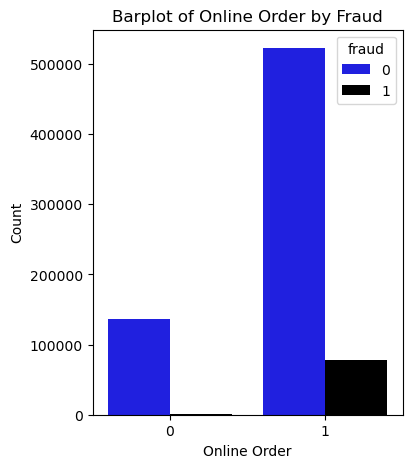

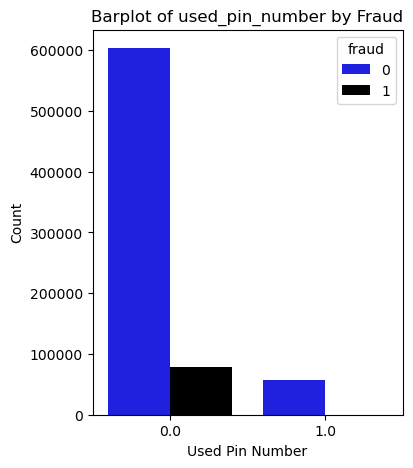

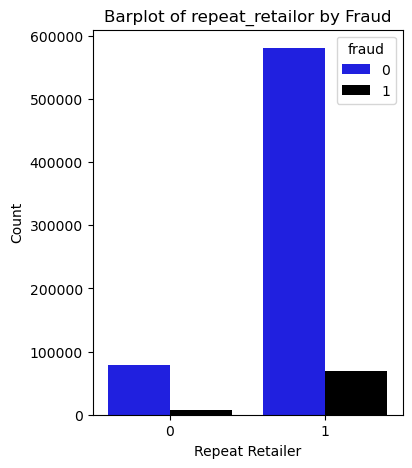

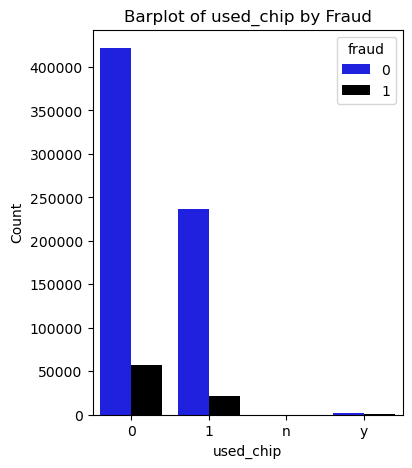

In [12]:
import pandas as pd

df = data_df.select("fraud", "online_order").toPandas()
plt.figure(figsize=(4, 5))
sns.countplot(x='online_order', hue='fraud', data=df, palette={0: "blue", 1: "black"} )
plt.title('Barplot of Online Order by Fraud')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.show()


df = data_df.select("fraud", "used_pin_number").toPandas()
plt.figure(figsize=(4, 5))
sns.countplot(x='used_pin_number', hue='fraud', data=df, palette={0: "blue", 1: "black"} )
plt.title('Barplot of used_pin_number by Fraud')
plt.xlabel('Used Pin Number')
plt.ylabel('Count')
plt.show()

df = data_df.select("fraud", "repeat_retailer").toPandas()
plt.figure(figsize=(4, 5))
sns.countplot(x='repeat_retailer', hue='fraud', data=df, palette={0: "blue", 1: "black"} )
plt.title('Barplot of repeat_retailor by Fraud')
plt.xlabel('Repeat Retailer')
plt.ylabel('Count')
plt.show()

df = data_df.select("fraud", "used_chip").toPandas()
plt.figure(figsize=(4, 5))
sns.countplot(x='used_chip', hue='fraud', data=df, palette={0: "blue", 1: "black"} )
plt.title('Barplot of used_chip by Fraud')
plt.xlabel('used_chip')
plt.ylabel('Count')
plt.show()

In [13]:
# 3.1
data_df = data_df.drop('transaction_id', 'card_number')
data_df.show()

+-----+----------+---------------------------+---------------+---------+---------------+------------+-----------------------+------------------+------------------+------------------------------+
|fraud|issue_year|days_since_last_transaction|repeat_retailer|used_chip|used_pin_number|online_order|single_transaction_mean|transaction_amount|distance_from_home|distance_from_last_transaction|
+-----+----------+---------------------------+---------------+---------+---------------+------------+-----------------------+------------------+------------------+------------------------------+
|    1|      2022|                         35|              0|        1|              0|           1|                 140.74|  1110.85175043292|            1.3029|                   2.317764573|
|    0|      2019|                          6|              1|        0|              0|           1|                  43.08|     96.2740695204|           23.4669|                   2.706211404|
|    0|      2020|       

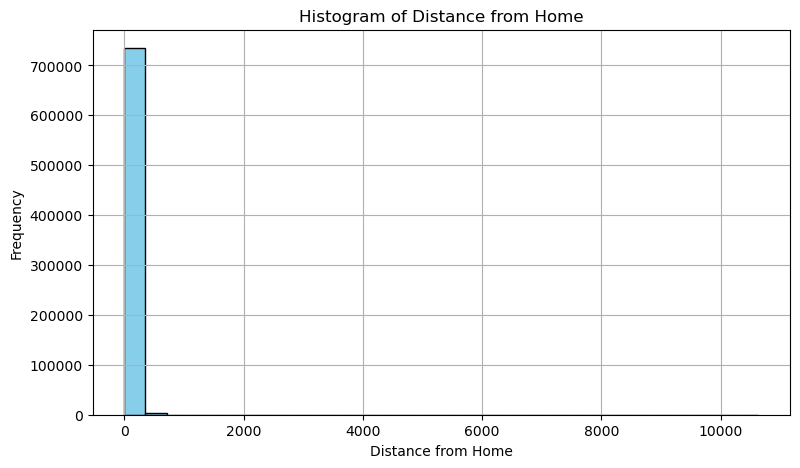

In [14]:
distance_from_home_values = data_df.select("distance_from_home").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(9, 5))
plt.hist(distance_from_home_values, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Distance from Home')
plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

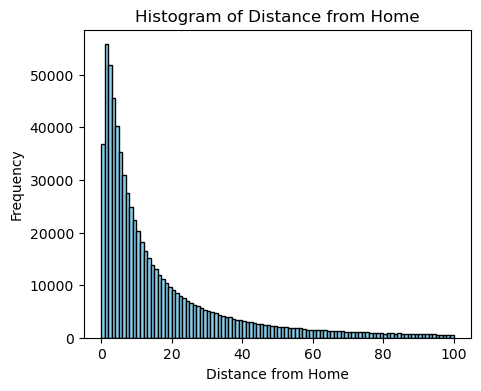

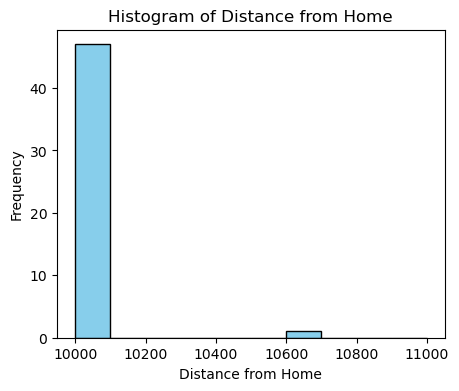

In [15]:
plt.figure(figsize=(5, 4))
plt.hist(distance_from_home_values, bins=100, range=(0, 100), color='skyblue', edgecolor='black')
plt.title('Histogram of Distance from Home')
plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
# plt.xlim(0, 100)
plt.show()

plt.figure(figsize=(5, 4))
plt.hist(distance_from_home_values, range=(9998, 11000), color='skyblue', edgecolor='black')
plt.title('Histogram of Distance from Home')
plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.show()

In [16]:
from pyspark.sql.functions import when

data_df = data_df.withColumn("distance_from_home", when(data_df["distance_from_home"] == 9999, 2).otherwise(data_df["distance_from_home"]))
data_df = data_df.filter(data_df["distance_from_home"] <= 10000)

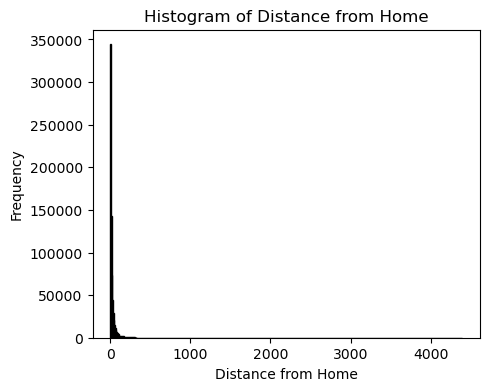

In [17]:
distance_from_home_values = data_df.select("distance_from_home").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(5, 4))
plt.hist(distance_from_home_values, bins=500, color='skyblue', edgecolor='black')
plt.title('Histogram of Distance from Home')
plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.show()

In [18]:
from scipy.stats import chi2_contingency
import pandas as pd

df = data_df.select("used_pin_number", "online_order").toPandas()
df = pd.DataFrame(df)

cross_table = pd.crosstab(df['used_pin_number'], df['online_order'])
chi2, p, dof, expected = chi2_contingency(cross_table)
print('Chi Square Value:', chi2)
print('p-value:', p)
print(cross_table)


Chi Square Value: 75178.2415793383
p-value: 0.0
online_order          0       1
used_pin_number                
0.0              102566  578585
1.0               34978   21662


In [19]:
data_df = data_df.withColumn("used_pin_number", 
    when(data_df["online_order"] == 1, 0)
    .otherwise(1)
)

In [20]:
# 3.3

from pyspark.sql.functions import col, round

data_df = data_df.withColumn("ratio_to_median_purchase_price", round(col("transaction_amount") / col("single_transaction_mean"), 2))

In [21]:
# 3.5
data_df = data_df.withColumn("used_chip", 
    when(data_df["used_chip"] == "y", 1)
    .when(data_df["used_chip"] == "n", 0)
    .when(data_df["used_chip"] == "1", 1)
    .when(data_df["used_chip"] == "0", 0)                             
    .otherwise(0)
)

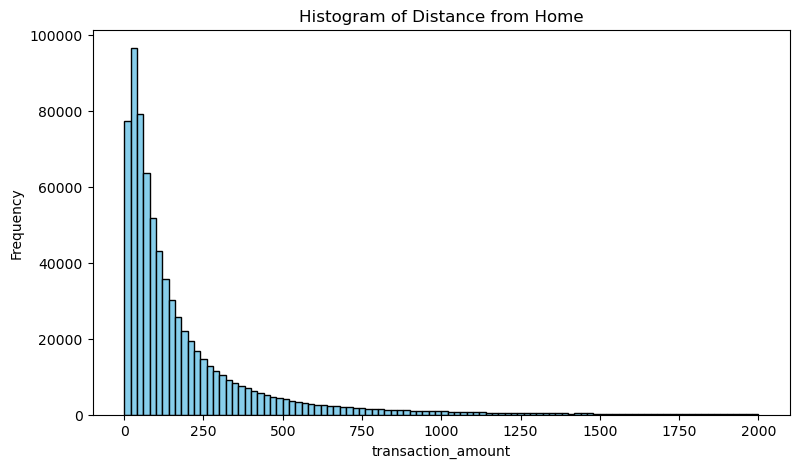

In [22]:
# 4.2对数转换
transaction_amount_values = data_df.select("transaction_amount").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(9, 5))
plt.hist(transaction_amount_values, bins=100, range=(0, 2000), color='skyblue', edgecolor='black')
plt.title('Histogram of Distance from Home')
plt.xlabel('transaction_amount')
plt.ylabel('Frequency')
plt.show()

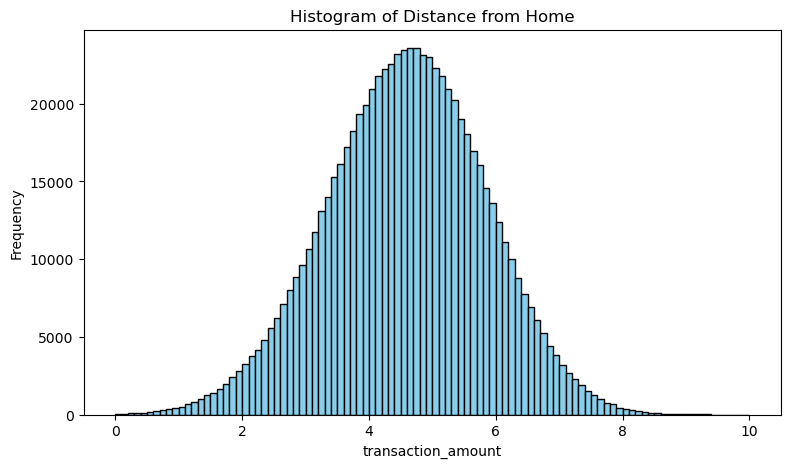

In [23]:
from pyspark.sql.functions import log

data_df = data_df.withColumn("log_transaction_amount", log(data_df["transaction_amount"]))

log_transaction_amount_values = data_df.select("log_transaction_amount").rdd.flatMap(lambda x: x).collect()
plt.figure(figsize=(9, 5))
plt.hist(log_transaction_amount_values, bins=100, range=(0, 10), color='skyblue', edgecolor='black')
plt.title('Histogram of Distance from Home')
plt.xlabel('transaction_amount')
plt.ylabel('Frequency')
plt.show()


In [24]:
# 离散化
data_df = data_df.withColumn("days_since_last_transaction_category",
                             when(data_df["days_since_last_transaction"] <= 45, '1')
                             .when((data_df["days_since_last_transaction"] > 45), '2')
                             .otherwise(1))

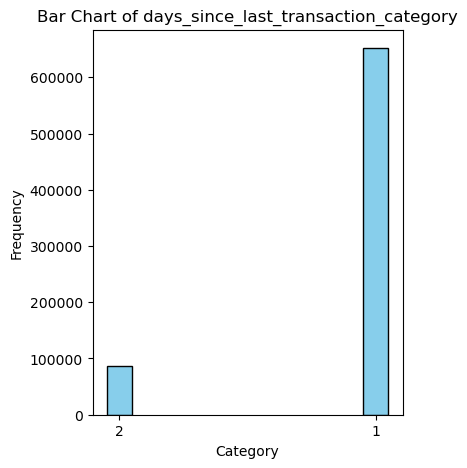

In [25]:
category_values = data_df.select("days_since_last_transaction_category").rdd.flatMap(lambda x: x).collect()
category_counts = {}
for category in set(category_values):
    category_counts[category] = category_values.count(category)
plt.figure(figsize=(4, 5))
plt.bar(category_counts.keys(), category_counts.values(), color='skyblue', edgecolor='black', width=0.1)
plt.title('Bar Chart of days_since_last_transaction_category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

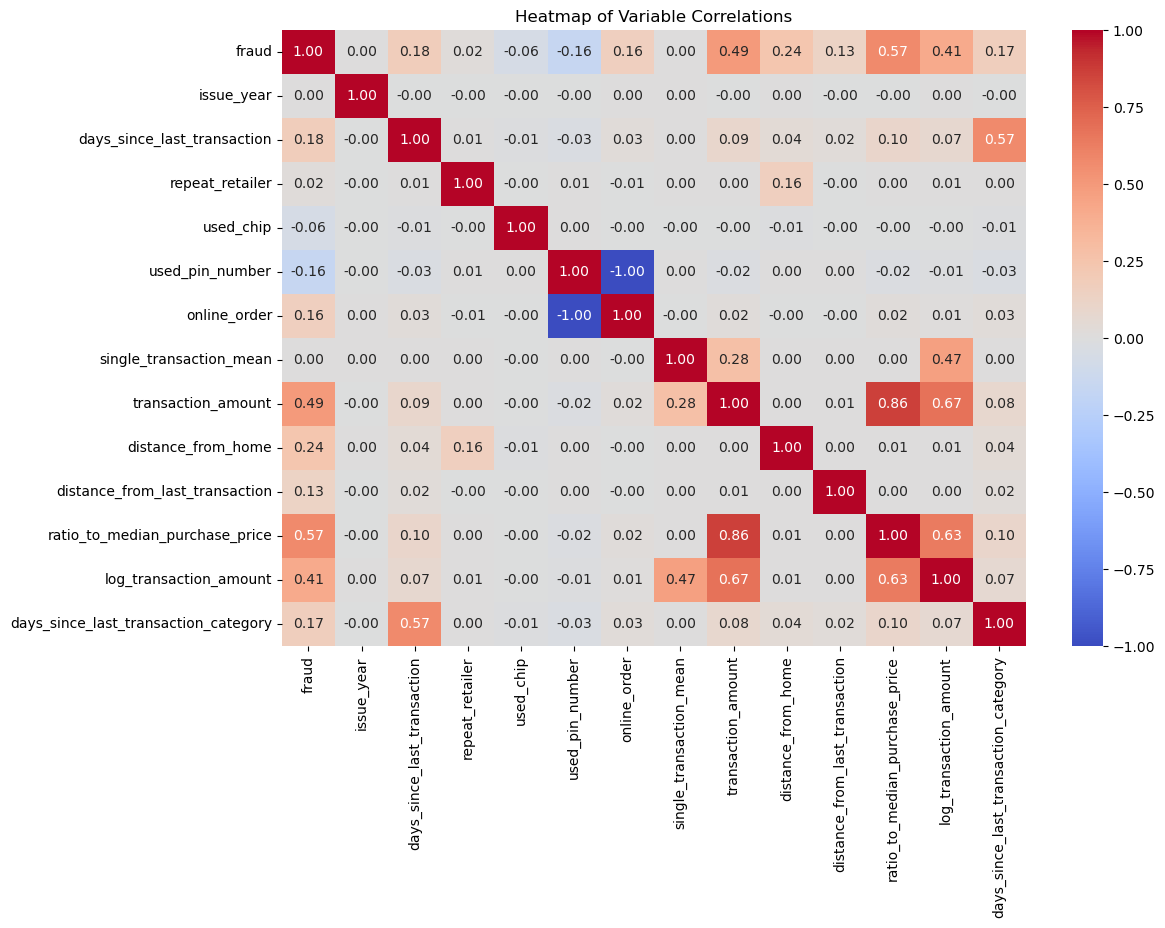

In [26]:
# 将 PySpark DataFrame 转换为 Pandas DataFrame
pandas_df = data_df.toPandas()

# 计算相关系数矩阵
correlation_matrix = pandas_df.corr()

# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Variable Correlations')
plt.show()


In [27]:
selected_df = data_df.select('distance_from_home', 'distance_from_last_transaction', 'online_order', 'transaction_amount', 'ratio_to_median_purchase_price', 'days_since_last_transaction', 'fraud')


In [28]:
data = selected_df

In [29]:
summary = data.describe().toPandas()
print(summary)

  summary  distance_from_home distance_from_last_transaction  \
0   count              737925                         737925   
1    mean  25.233874336986226                4.7713194860066   
2  stddev  55.858445062130286             19.077687334945253   
3     min              0.0049                     3.19213E-4   
4     max         4394.314607                    2160.499922   

         online_order  transaction_amount ratio_to_median_purchase_price  \
0              737925              737925                         737925   
1  0.8135623538977539  206.01691131321914             1.8051759054104382   
2  0.3894596972292426   356.7043849210584              2.689030061776277   
3                   0        0.2539031924                            0.0   
4                   1     50415.019394584                         266.69   

  days_since_last_transaction                fraud  
0                      737925               737925  
1          25.964259240437713  0.10555815292882068  

In [30]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import rand
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# 假设您已经设置了 SparkSession，并且数据已经加载到 DataFrame 'data' 中

# # 对欺诈数据进行欠采样
# fraud_count = data.filter(col("fraud") == 1).count()
# non_fraud_count = data.filter(col("fraud") == 0).count()

# # 欠采样比例
# undersampling_ratio = fraud_count / non_fraud_count

# # 随机欠采样非欺诈数据
# undersampled_non_fraud_data = data.filter(col("fraud") == 0).sample(withReplacement=False, fraction=undersampling_ratio)

# # 合并欠采样后的数据
# undersampled_data = data.filter(col("fraud") == 1).unionAll(undersampled_non_fraud_data)
# undersampled_data = undersampled_data.orderBy(rand())
data = data.orderBy(rand())

# 3. 特征工程：将特征列合并为一个向量列
feature_cols = ['distance_from_home', 'distance_from_last_transaction', 'online_order', 
                'transaction_amount', 'ratio_to_median_purchase_price', 
                'days_since_last_transaction']
vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data_with_features = vector_assembler.transform(data)

# 4. 拆分数据集为训练集和测试集
train_data, test_data = data_with_features.randomSplit([0.7, 0.3])

# 5. 建立逻辑回归模型
lr = LogisticRegression(featuresCol="features", labelCol="fraud")

# 6. 训练模型
lr_model = lr.fit(train_data)

# 7. 评估模型
predictions = lr_model.transform(test_data)

# 使用二元分类评估器评估模型
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="fraud")
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})

print("Area Under ROC:", accuracy)



24/05/08 10:53:21 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/05/08 10:53:21 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


Area Under ROC: 0.989101815822885


In [31]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# 7. 评估模型
predictions = lr_model.transform(test_data)

# 计算准确率
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="fraud", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator_accuracy.evaluate(predictions)

# 计算 F1 分数
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="fraud", predictionCol="prediction", metricName="f1")
f1_score = evaluator_f1.evaluate(predictions)

print("Accuracy:", accuracy)
print("F1 Score:", f1_score)

# 输出模型拟合结果
predictions.select("fraud", "prediction", "probability").show(20)

# 输出模型系数
coefficients = lr_model.coefficients
print("Coefficients:", coefficients)

# 输出模型截距
intercept = lr_model.intercept
print("Intercept:", intercept)

Accuracy: 0.9688760001082417
F1 Score: 0.9675400154001396


+-----+----------+--------------------+
|fraud|prediction|         probability|
+-----+----------+--------------------+
|    0|       0.0|[0.98126101459943...|
|    0|       0.0|[0.99999999976092...|
|    1|       1.0|[0.00698326759286...|
|    0|       0.0|[0.97638543240255...|
|    0|       0.0|[0.99875138071963...|
|    0|       0.0|[0.99781372225009...|
|    0|       0.0|[0.99769727588324...|
|    0|       0.0|[0.99883653483397...|
|    0|       0.0|[0.99418751687433...|
|    0|       0.0|[0.99352140485280...|
|    0|       0.0|[0.99862864616308...|
|    0|       0.0|[0.99659648217461...|
|    0|       0.0|[0.99947948825285...|
|    1|       1.0|[0.03424303315225...|
|    0|       0.0|[0.99699285345018...|
|    0|       0.0|[0.91175230358227...|
|    1|       1.0|[0.00693988559094...|
|    1|       1.0|[0.22826918796214...|
|    0|       0.0|[0.94705127691648...|
|    0|       0.0|[0.91497577915826...|
+-----+----------+--------------------+
only showing top 20 rows

Coefficients: 

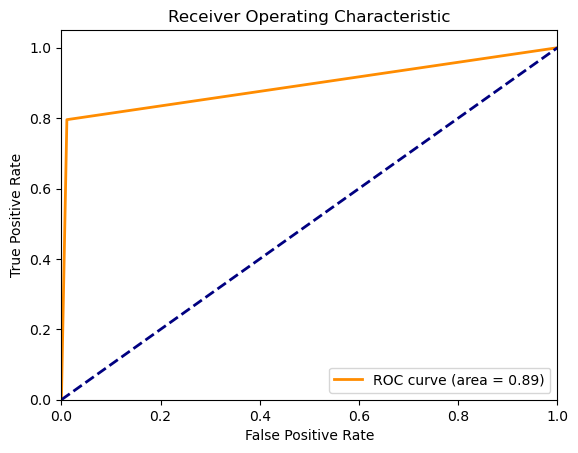

In [32]:
from sklearn.metrics import roc_curve, auc, recall_score

pred = predictions.toPandas()
y_test = pred['fraud']
y_pred = pred['prediction']


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from pyspark.ml.linalg import DenseVector

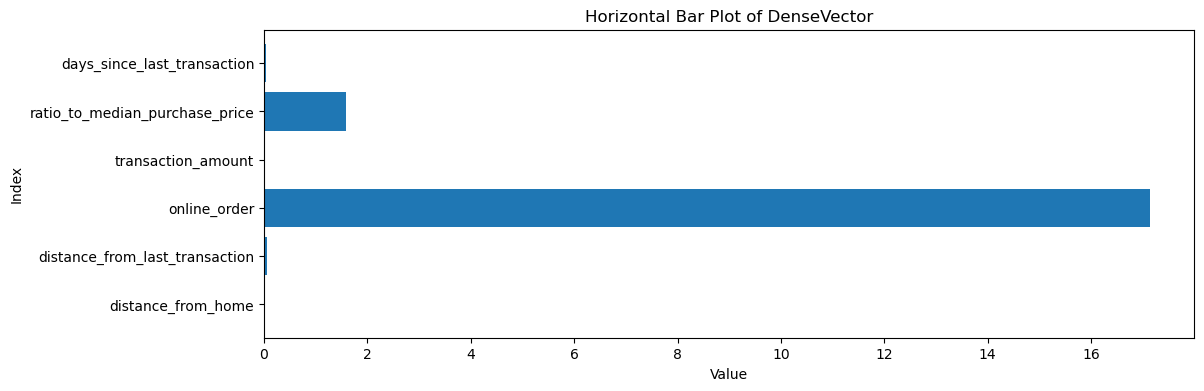

In [34]:
numpy_array = np.array(coefficients)

index = np.arange(len(numpy_array))
index_labels = ['distance_from_home', 'distance_from_last_transaction', 'online_order', 
                'transaction_amount', 'ratio_to_median_purchase_price', 
                'days_since_last_transaction']

# 绘制横向条形图
plt.figure(figsize=(12, 4))
plt.barh(index, numpy_array)
plt.ylabel('Index')
plt.xlabel('Value')
plt.title('Horizontal Bar Plot of DenseVector')
plt.yticks(index, index_labels)
plt.show()

In [35]:
coefficients

DenseVector([0.028, 0.0482, 17.1345, -0.0, 1.5826, 0.0308])

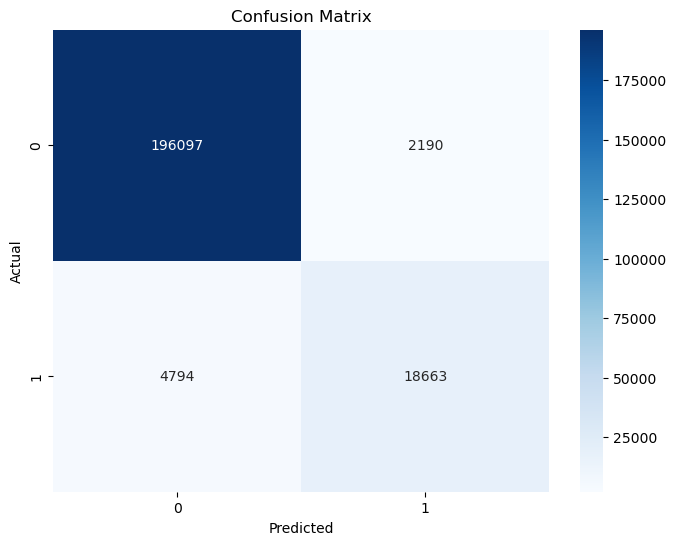

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 pred 是您的 DataFrame，y_test 是真实标签，y_pred 是预测标签
cm = confusion_matrix(y_test, y_pred)

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Predictions: [1.         0.96862524 1.         ... 1.         1.         1.        ]


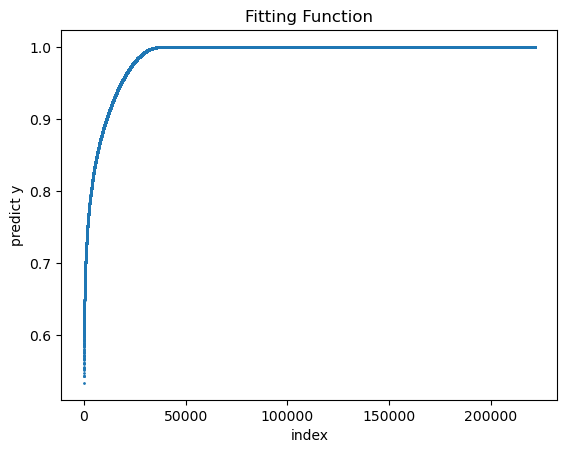

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 假设您已经有了逻辑回归模型的参数 lr_model
# 提取权重和偏置项
# weights = lr_model.coefficients
# # weights = pd.DataFrame(weights)
# bias = lr_model.intercept
# X = data['distance_from_home', 'distance_from_last_transaction', 'online_order', 
#                 'transaction_amount', 'ratio_to_median_purchase_price', 
#                 'days_since_last_transaction'].toPandas()

# 定义 Sigmoid 函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, beta):
    z = np.dot(X, beta)
    return sigmoid(z)

X_np = test_data['distance_from_home', 'distance_from_last_transaction', 'online_order','transaction_amount', 
'ratio_to_median_purchase_price', 'days_since_last_transaction'].toPandas()
y_np = lr_model.coefficients

predictions = logistic_regression(X_np, y_np)
print("Predictions:", predictions)
y = pd.DataFrame(predictions)
y = y.sort_values(by=0)
y_2 = test_data
x = list(range(len(y)))
fun_df = pd.concat([pd.DataFrame(x), y], axis=1)
plt.scatter(x ,y, s=1)
plt.title('Fitting Function')
plt.xlabel('index')
plt.ylabel('predict y')
plt.show()


Optimization terminated successfully.
         Current function value: 0.343511
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:               737925
Model:                          Logit   Df Residuals:                   737919
Method:                           MLE   Df Model:                            5
Date:                Wed, 08 May 2024   Pseudo R-squ.:                -0.01894
Time:                        10:53:58   Log-Likelihood:            -2.5349e+05
converged:                       True   LL-Null:                   -2.4877e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
distance_from_home                 0.0060   6.29e-05     95.146     

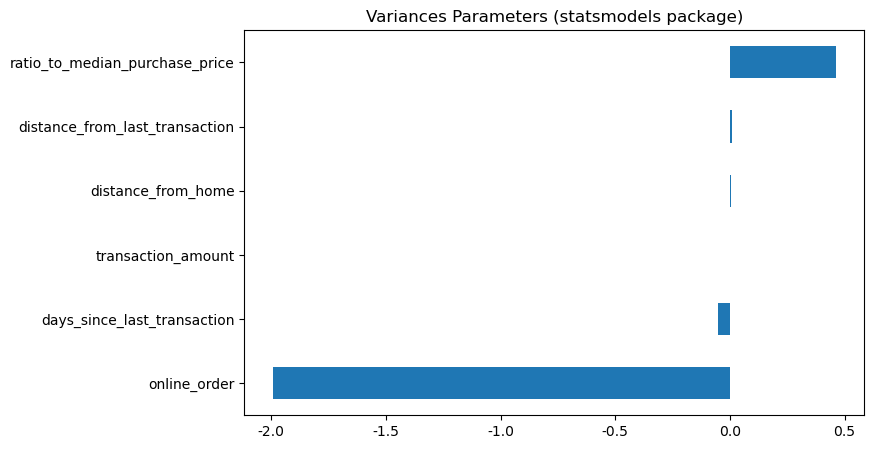

Predictions: [0.17629887 0.03189294 0.02012489 ... 0.08369819 0.03432059 0.14394617]


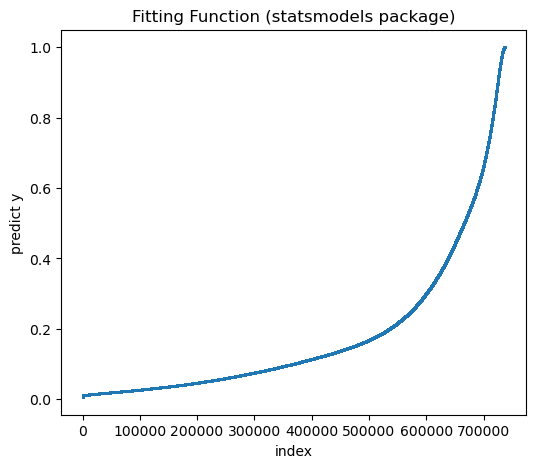

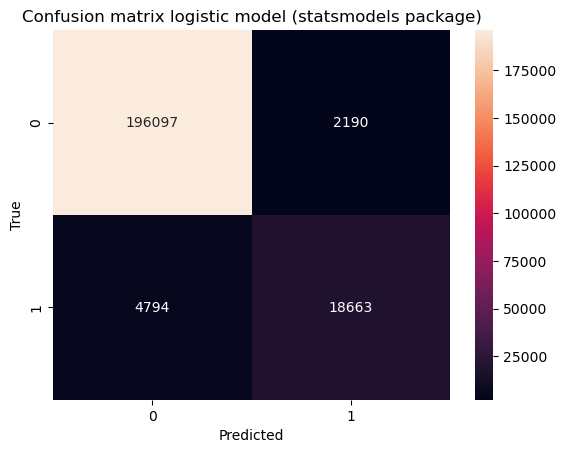

In [38]:
import statsmodels.api as sm

data_log = data.toPandas()
## logistic model(statsmodels package)
X = data_log[['distance_from_home', 'distance_from_last_transaction', 'online_order','transaction_amount', 
'ratio_to_median_purchase_price', 'days_since_last_transaction']]
y = data_log['fraud']
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())


# In[24.2]:

## visualization for Variances Importances
plt.rcParams['axes.unicode_minus'] = False
coef = pd.Series(result.params, index = X.columns, name = 'Var')
plt.figure(figsize=(8, 5))
coef.sort_values().plot(kind='barh')
plt.title('Variances Parameters (statsmodels package)')
plt.show()

# In[24.3]:

## visualization for fitting pattern
X = pd.DataFrame(X)
X_np = X.to_numpy()
y_np = np.array(result.params)
predictions = logistic_regression(X_np, y_np)
print("Predictions:", predictions)
y = pd.DataFrame(predictions)
y = y.sort_values(by=0)
y_2 = X
x = list(range(len(y)))
fun_df = pd.concat([pd.DataFrame(x), y], axis=1)
plt.figure(figsize=(6, 5))
plt.scatter(x ,y , s=1)
plt.title('Fitting Function (statsmodels package)')
plt.xlabel('index')
plt.ylabel('predict y')
plt.show()

## visualization for confusion matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix logistic model (statsmodels package)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [39]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession

lasso = LinearRegression(featuresCol='features', labelCol='fraud', elasticNetParam=1.0)

# 在训练集上拟合模型
lasso_model = lasso.fit(train_data)

# 打印模型系数和截距
print("Coefficients: " + str(lasso_model.coefficients))
print("Intercept: " + str(lasso_model.intercept))

# 在测试集上进行预测
predictions = lasso_model.transform(test_data)
predictions = predictions.withColumn("prediction", when(predictions["prediction"] > 0.43, 1.0).otherwise(0.0))

# 打印预测结果
predictions.select('features', 'fraud', 'prediction').show()

24/05/08 10:54:02 WARN Instrumentation: [e79a592f] regParam is zero, which might cause numerical instability and overfitting.
24/05/08 10:54:03 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


Coefficients: [0.0012602627351171532,0.002036327182083389,0.11487741532926359,4.75254611576645e-06,0.06461370680661603,0.002028160971415408]
Intercept: -0.19961678282004544


+--------------------+-----+----------+
|            features|fraud|prediction|
+--------------------+-----+----------+
|[0.03346175,10.25...|    0|       0.0|
|[0.0362,2.3169400...|    0|       0.0|
|[0.056879044,10.7...|    1|       1.0|
|[0.0613,2.3917472...|    0|       0.0|
|[0.068104999,1.13...|    0|       0.0|
|[0.075911122,0.07...|    0|       0.0|
|[0.0792,0.2224786...|    0|       0.0|
|[0.0836,3.3518759...|    0|       0.0|
|[0.0865,1.2747402...|    0|       0.0|
|[0.095931913,0.51...|    0|       0.0|
|[0.099007573,8.68...|    1|       1.0|
|[0.099312848,2.01...|    0|       0.0|
|[0.1016,0.4175722...|    0|       0.0|
|[0.101728239,3.00...|    0|       0.0|
|[0.101904206,138....|    1|       1.0|
|[0.103650751,0.01...|    0|       0.0|
|[0.1058,0.1274396...|    0|       0.0|
|[0.106328034,13.7...|    1|       1.0|
|[0.107865375,2.53...|    0|       0.0|
|[0.109436282,1.12...|    0|       0.0|
+--------------------+-----+----------+
only showing top 20 rows



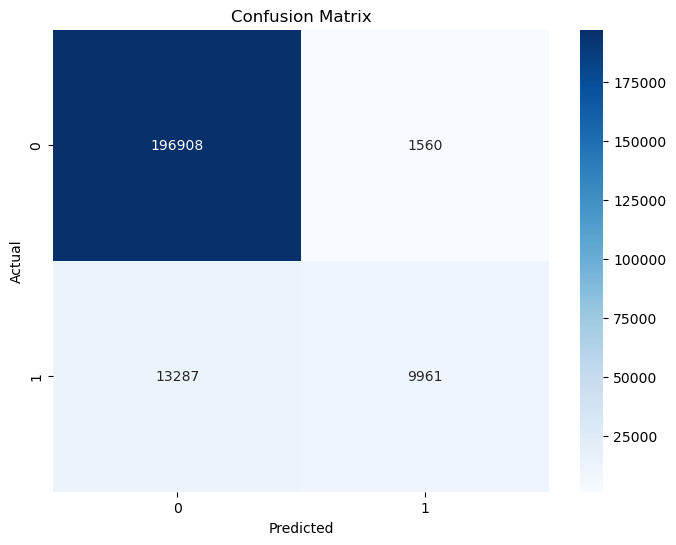

In [40]:
pred = predictions.toPandas()
y_test = pred['fraud']
y_pred = pred['prediction']

# 假设 pred 是您的 DataFrame，y_test 是真实标签，y_pred 是预测标签
cm = confusion_matrix(y_test, y_pred)

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
# 计算准确率
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="fraud", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator_accuracy.evaluate(predictions)

# 计算 F1 分数
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="fraud", predictionCol="prediction", metricName="f1")
f1_score = evaluator_f1.evaluate(predictions)

print(accuracy)
print(f1_score)

0.932950537207603
0.9231750928575405


24/05/08 10:54:23 WARN Instrumentation: [89b3845c] regParam is zero, which might cause numerical instability and overfitting.


Coefficients: [0.0012621406683404996,0.001941195071103576,0.11513143883953697,-5.303975971877095e-06,0.06576104013489172,0.0020468690293775527]
Intercept: -0.19989540824021226


0.9231557423297929
0.9064114605802975


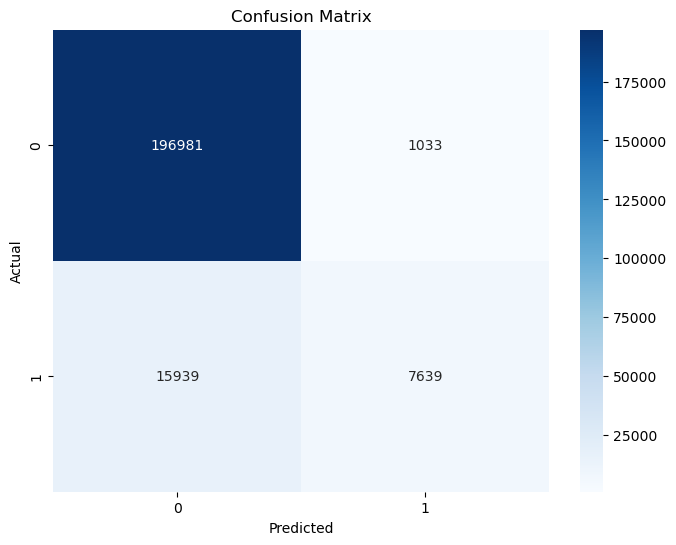

In [42]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession

# 3. 特征工程：将特征列合并为一个向量列
feature_cols = ['distance_from_home', 'distance_from_last_transaction', 'online_order', 
                'transaction_amount', 'ratio_to_median_purchase_price', 
                'days_since_last_transaction']
vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data_with_features = vector_assembler.transform(data_df)
data_with_features = data_with_features.orderBy(rand())
# 4. 拆分数据集为训练集和测试集
train_data, test_data = data_with_features.randomSplit([0.7, 0.3])

# 建立线性回归模型
lr = LinearRegression(featuresCol='features', labelCol='fraud')

# 训练模型
lr_model = lr.fit(train_data)

# 打印模型系数和截距
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

# 在测试集上进行预测
predictions = lr_model.transform(test_data)
predictions = predictions.withColumn("prediction", when(predictions["prediction"] > 0.5, 1.0).otherwise(0.0))

# 计算准确率
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="fraud", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator_accuracy.evaluate(predictions)

# 计算 F1 分数
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="fraud", predictionCol="prediction", metricName="f1")
f1_score = evaluator_f1.evaluate(predictions)

print(accuracy)
print(f1_score)

pred = predictions.toPandas()
y_test = pred['fraud']
y_pred = pred['prediction']

# 假设 pred 是您的 DataFrame，y_test 是真实标签，y_pred 是预测标签
cm = confusion_matrix(y_test, y_pred)

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

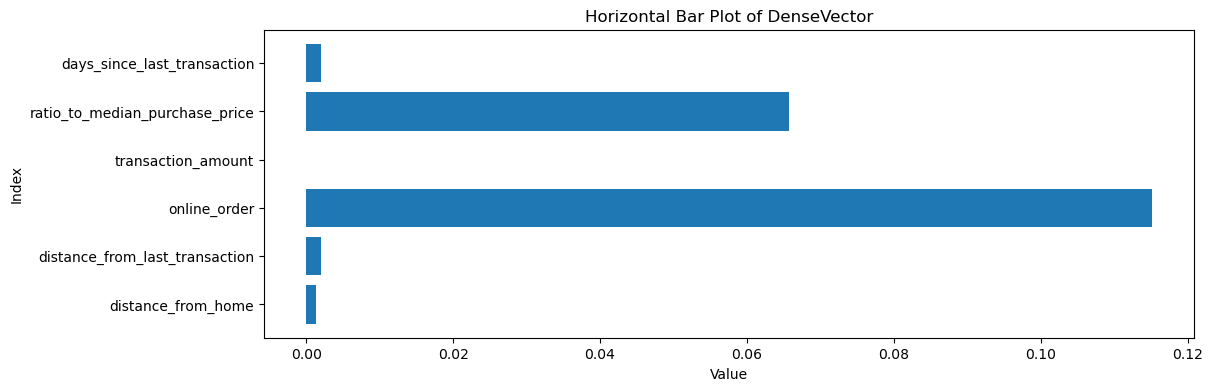

In [43]:
coefficients = lr_model.coefficients

numpy_array = np.array(coefficients)

index = np.arange(len(numpy_array))
index_labels = ['distance_from_home', 'distance_from_last_transaction', 'online_order', 
                'transaction_amount', 'ratio_to_median_purchase_price', 
                'days_since_last_transaction']

# 绘制横向条形图
plt.figure(figsize=(12, 4))
plt.barh(index, numpy_array)
plt.ylabel('Index')
plt.xlabel('Value')
plt.title('Horizontal Bar Plot of DenseVector')
plt.yticks(index, index_labels)

plt.show()

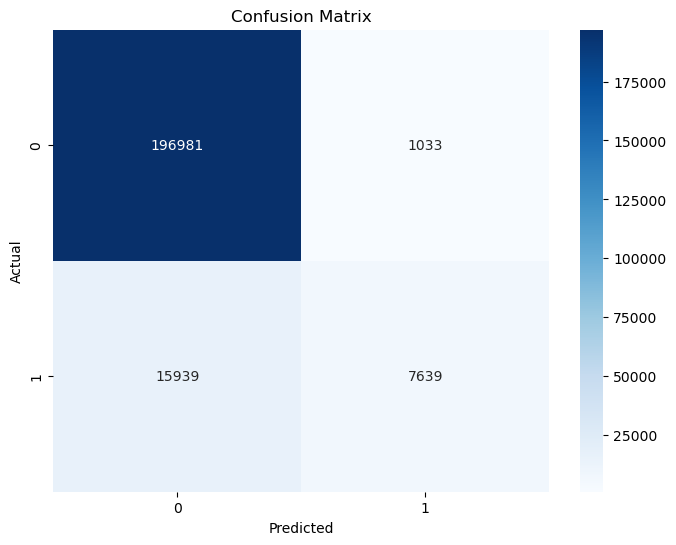

In [44]:
pred = predictions.toPandas()
y_test = pred['fraud']
y_pred = pred['prediction']

# 假设 pred 是您的 DataFrame，y_test 是真实标签，y_pred 是预测标签
cm = confusion_matrix(y_test, y_pred)

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [45]:
# 计算准确率
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="fraud", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator_accuracy.evaluate(predictions)

# 计算 F1 分数
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="fraud", predictionCol="prediction", metricName="f1")
f1_score = evaluator_f1.evaluate(predictions)

print(accuracy)
print(f1_score)

0.9230894154903845
0.9073436751232459


In [46]:
pred = predictions.toPandas()
y_test = pred['fraud']
y_pred = pred['prediction']

In [47]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.sql import SparkSession

dt = DecisionTreeClassifier(featuresCol='features', labelCol='fraud')

# 拟合模型
dt_model = dt.fit(train_data)

# 在测试集上进行预测
predictions = dt_model.transform(test_data)

# 打印预测结果
predictions.select('features', 'fraud', 'prediction').show()

+--------------------+-----+----------+
|            features|fraud|prediction|
+--------------------+-----+----------+
|[1.268829049,2.43...|    0|       0.0|
|[1.0078,0.5014774...|    0|       0.0|
|[1.8447,0.5062697...|    0|       0.0|
|[0.9852,2.1275717...|    0|       0.0|
|[0.926999343,1.46...|    0|       0.0|
|[1.265604713,3.55...|    0|       0.0|
|[1.7267,0.1367424...|    0|       0.0|
|[0.6695,0.0963762...|    0|       0.0|
|[1.105,0.13815258...|    0|       0.0|
|[1.236155253,0.66...|    0|       0.0|
|[1.236774571,1.97...|    0|       0.0|
|[0.976929464,5.85...|    0|       0.0|
|[0.695762458,3.16...|    0|       0.0|
|[1.1724,0.8476132...|    0|       0.0|
|[1.580149348,0.02...|    0|       0.0|
|[17.06320458,1.30...|    0|       0.0|
|[44.11980038,4.87...|    0|       0.0|
|[21.4912,3.538111...|    0|       0.0|
|[12.6039,1.192858...|    0|       0.0|
|[1.949080377,0.33...|    0|       0.0|
+--------------------+-----+----------+
only showing top 20 rows



In [48]:
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="fraud", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator_accuracy.evaluate(predictions)

# 计算 F1 分数
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="fraud", predictionCol="prediction", metricName="f1")
f1_score = evaluator_f1.evaluate(predictions)

print(accuracy)
print(f1_score)


0.9760350451373068
0.97578918329498


In [60]:
type(tree_model.toDebugString)


str

In [ ]:
pip install graphviz

In [59]:
print("Number of nodes:", tree_model.numNodes)
print("Depth of tree:", tree_model.depth)
print("Feature importances:", tree_model.featureImportances)


Number of nodes: 25
Depth of tree: 5
Feature importances: (6,[0,1,2,4,5],[0.10123615973154898,0.014668764154989465,0.18044906653901754,0.6924088446763169,0.011237164898127195])
